# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy

# sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df1 = pd.DataFrame(pd.read_excel('./data/X_bp.xlsx', index_col=0))
df1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [4]:
df2 = pd.DataFrame(pd.read_excel('./data/X_nup.xlsx', index_col=0))
df2

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [5]:
df = pd.concat([df1, df2], join='inner', axis=1)
df.sample(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,90,6.078902,77.434468
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074
682,2.419589,1983.725401,102.701679,113.880736,19.849634,215.737021,422.627857,74.217095,1706.640170,112.894188,90,5.204978,50.572548
621,2.131998,2000.360856,1440.540362,125.469049,23.119782,249.835419,662.169994,68.342539,2072.586964,275.662927,90,10.421184,62.674086
67,3.452821,1868.348745,576.503658,87.386935,23.322423,291.339069,338.937141,73.593817,2957.915514,228.911724,0,5.082856,50.405848


In [6]:
df_cor = df.corr()
df_cor

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


<Axes: >

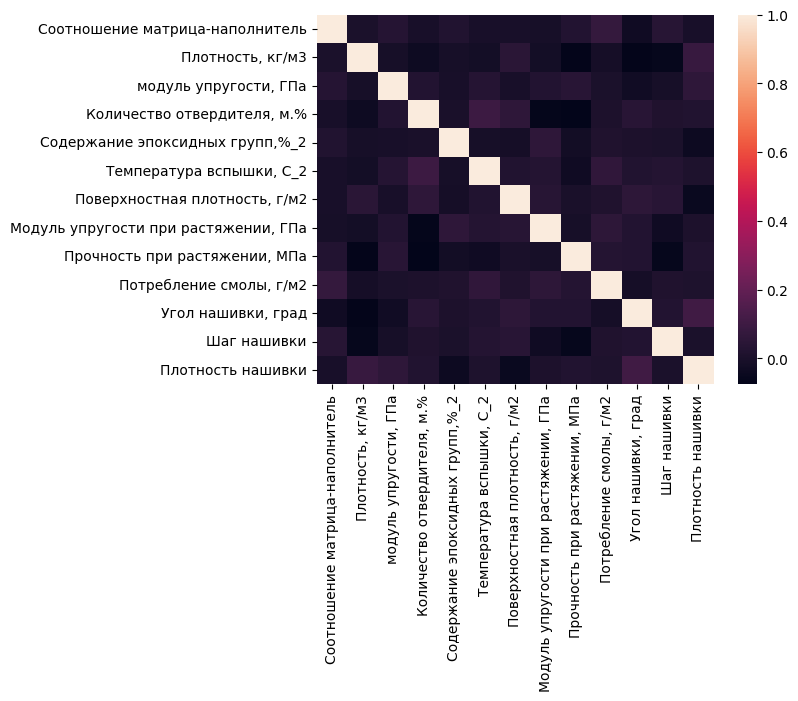

In [7]:
sns.heatmap(df_cor) 

# Эксперимент с разбиением на n класстеров

Идея: попробуем разбить датасет на некоторое колличество кластеров, и посмотреть на кореляцию внутри этих кластеров

In [8]:
from sklearn.cluster import KMeans

In [16]:
distortions = []
for i in range(1, 30):
    kmeans = KMeans(
        n_clusters=i, # На сколько кластеров поделить наш ДС
        init='random', # Начальная инициализация центров кластеров
        n_init=10, # Начальное колиечтво этих точек (центров класстеров)
        max_iter=300, # 
        tol=1e-04 # Величина изменения при сдвиге
    )
    kmeans_prediction = kmeans.fit_predict(df)
    # plt.title(f"Clasterisations result with {i} clusters")
    # Draw our points
    # plt.scatter(df[:, 0], df[:, 1], c=kmeans_prediction)
    # Draw our clusters centers
    # plt.scatter(*kmeans.cluster_centers_.T, # Вызываем наши центыр и транспонируем нашу матрицу
    #             marker='*', 
    #             s=200, 
    #             color='r')
    # plt.show()
    distortions.append(kmeans.inertia_)

## Метод локтя для подбора оптимального количества кластеров

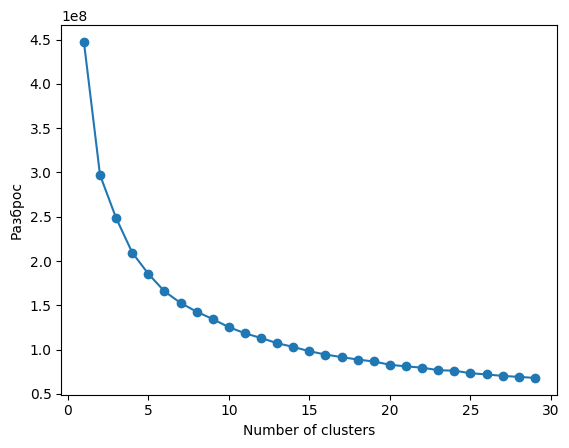

In [17]:
plt.plot(range(1,30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Разброс')
plt.show()

In [18]:
kmeans = KMeans(
    n_clusters=20, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)
kmeans_prediction

array([13, 13, 13, ..., 12, 10, 12])

In [22]:
kmeans_prediction.shape

(1023,)

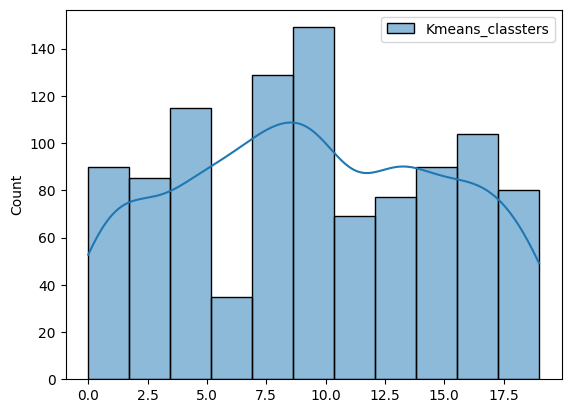

In [27]:
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

In [28]:
df['Kmeans_claster'] = kmeans_prediction

In [32]:
ds_by_clusters = []
for n in range(1,20):
    one_clusster = df.loc[(df['Kmeans_claster'] == n), ]
    ds_by_clusters.append(one_clusster)

In [35]:
ds_by_clusters[0].shape

(38, 14)

In [37]:
ds_by_clusters[0].corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Kmeans_claster
Соотношение матрица-наполнитель,1.000000,-0.076526,-0.175826,-0.136015,-0.141429,0.029925,-0.157453,0.088415,0.127588,0.041671,-0.058369,0.276845,0.191451,NaN
"Плотность, кг/м3",-0.076526,1.000000,0.076982,-0.066791,-0.148831,-0.206973,0.391428,-0.055714,-0.030607,-0.191165,-0.035060,-0.103194,0.216138,NaN
"модуль упругости, ГПа",-0.175826,0.076982,1.000000,0.074982,-0.220019,0.162828,0.088476,0.207769,0.218749,-0.007591,0.209241,-0.145242,0.030303,NaN
"Количество отвердителя, м.%",-0.136015,-0.066791,0.074982,1.000000,0.149123,-0.111420,0.015701,-0.088082,-0.025253,-0.103218,-0.000823,-0.020585,0.002534,NaN
"Содержание эпоксидных групп,%_2",-0.141429,-0.148831,-0.220019,0.149123,1.000000,-0.036862,-0.158657,-0.095539,-0.227763,-0.110530,0.040078,-0.123972,0.001042,NaN
"Температура вспышки, С_2",0.029925,-0.206973,0.162828,-0.111420,-0.036862,1.000000,-0.276138,-0.130985,-0.063918,0.153990,0.002557,0.024377,-0.162882,NaN
"Поверхностная плотность, г/м2",-0.157453,0.391428,0.088476,0.015701,-0.158657,-0.276138,1.000000,0.158381,0.148384,-0.295995,-0.172130,-0.149876,-0.274962,NaN
"Модуль упругости при растяжении, ГПа",0.088415,-0.055714,0.207769,-0.088082,-0.095539,-0.130985,0.158381,1.000000,0.173865,0.015394,0.278485,-0.187922,0.220705,NaN
"Прочность при растяжении, МПа",0.127588,-0.030607,0.218749,-0.025253,-0.227763,-0.063918,0.148384,0.173865,1.000000,-0.236235,-0.231385,0.094861,-0.229104,NaN
"Потребление смолы, г/м2",0.041671,-0.191165,-0.007591,-0.103218,-0.110530,0.153990,-0.295995,0.015394,-0.236235,1.000000,0.181534,0.067374,0.357641,NaN


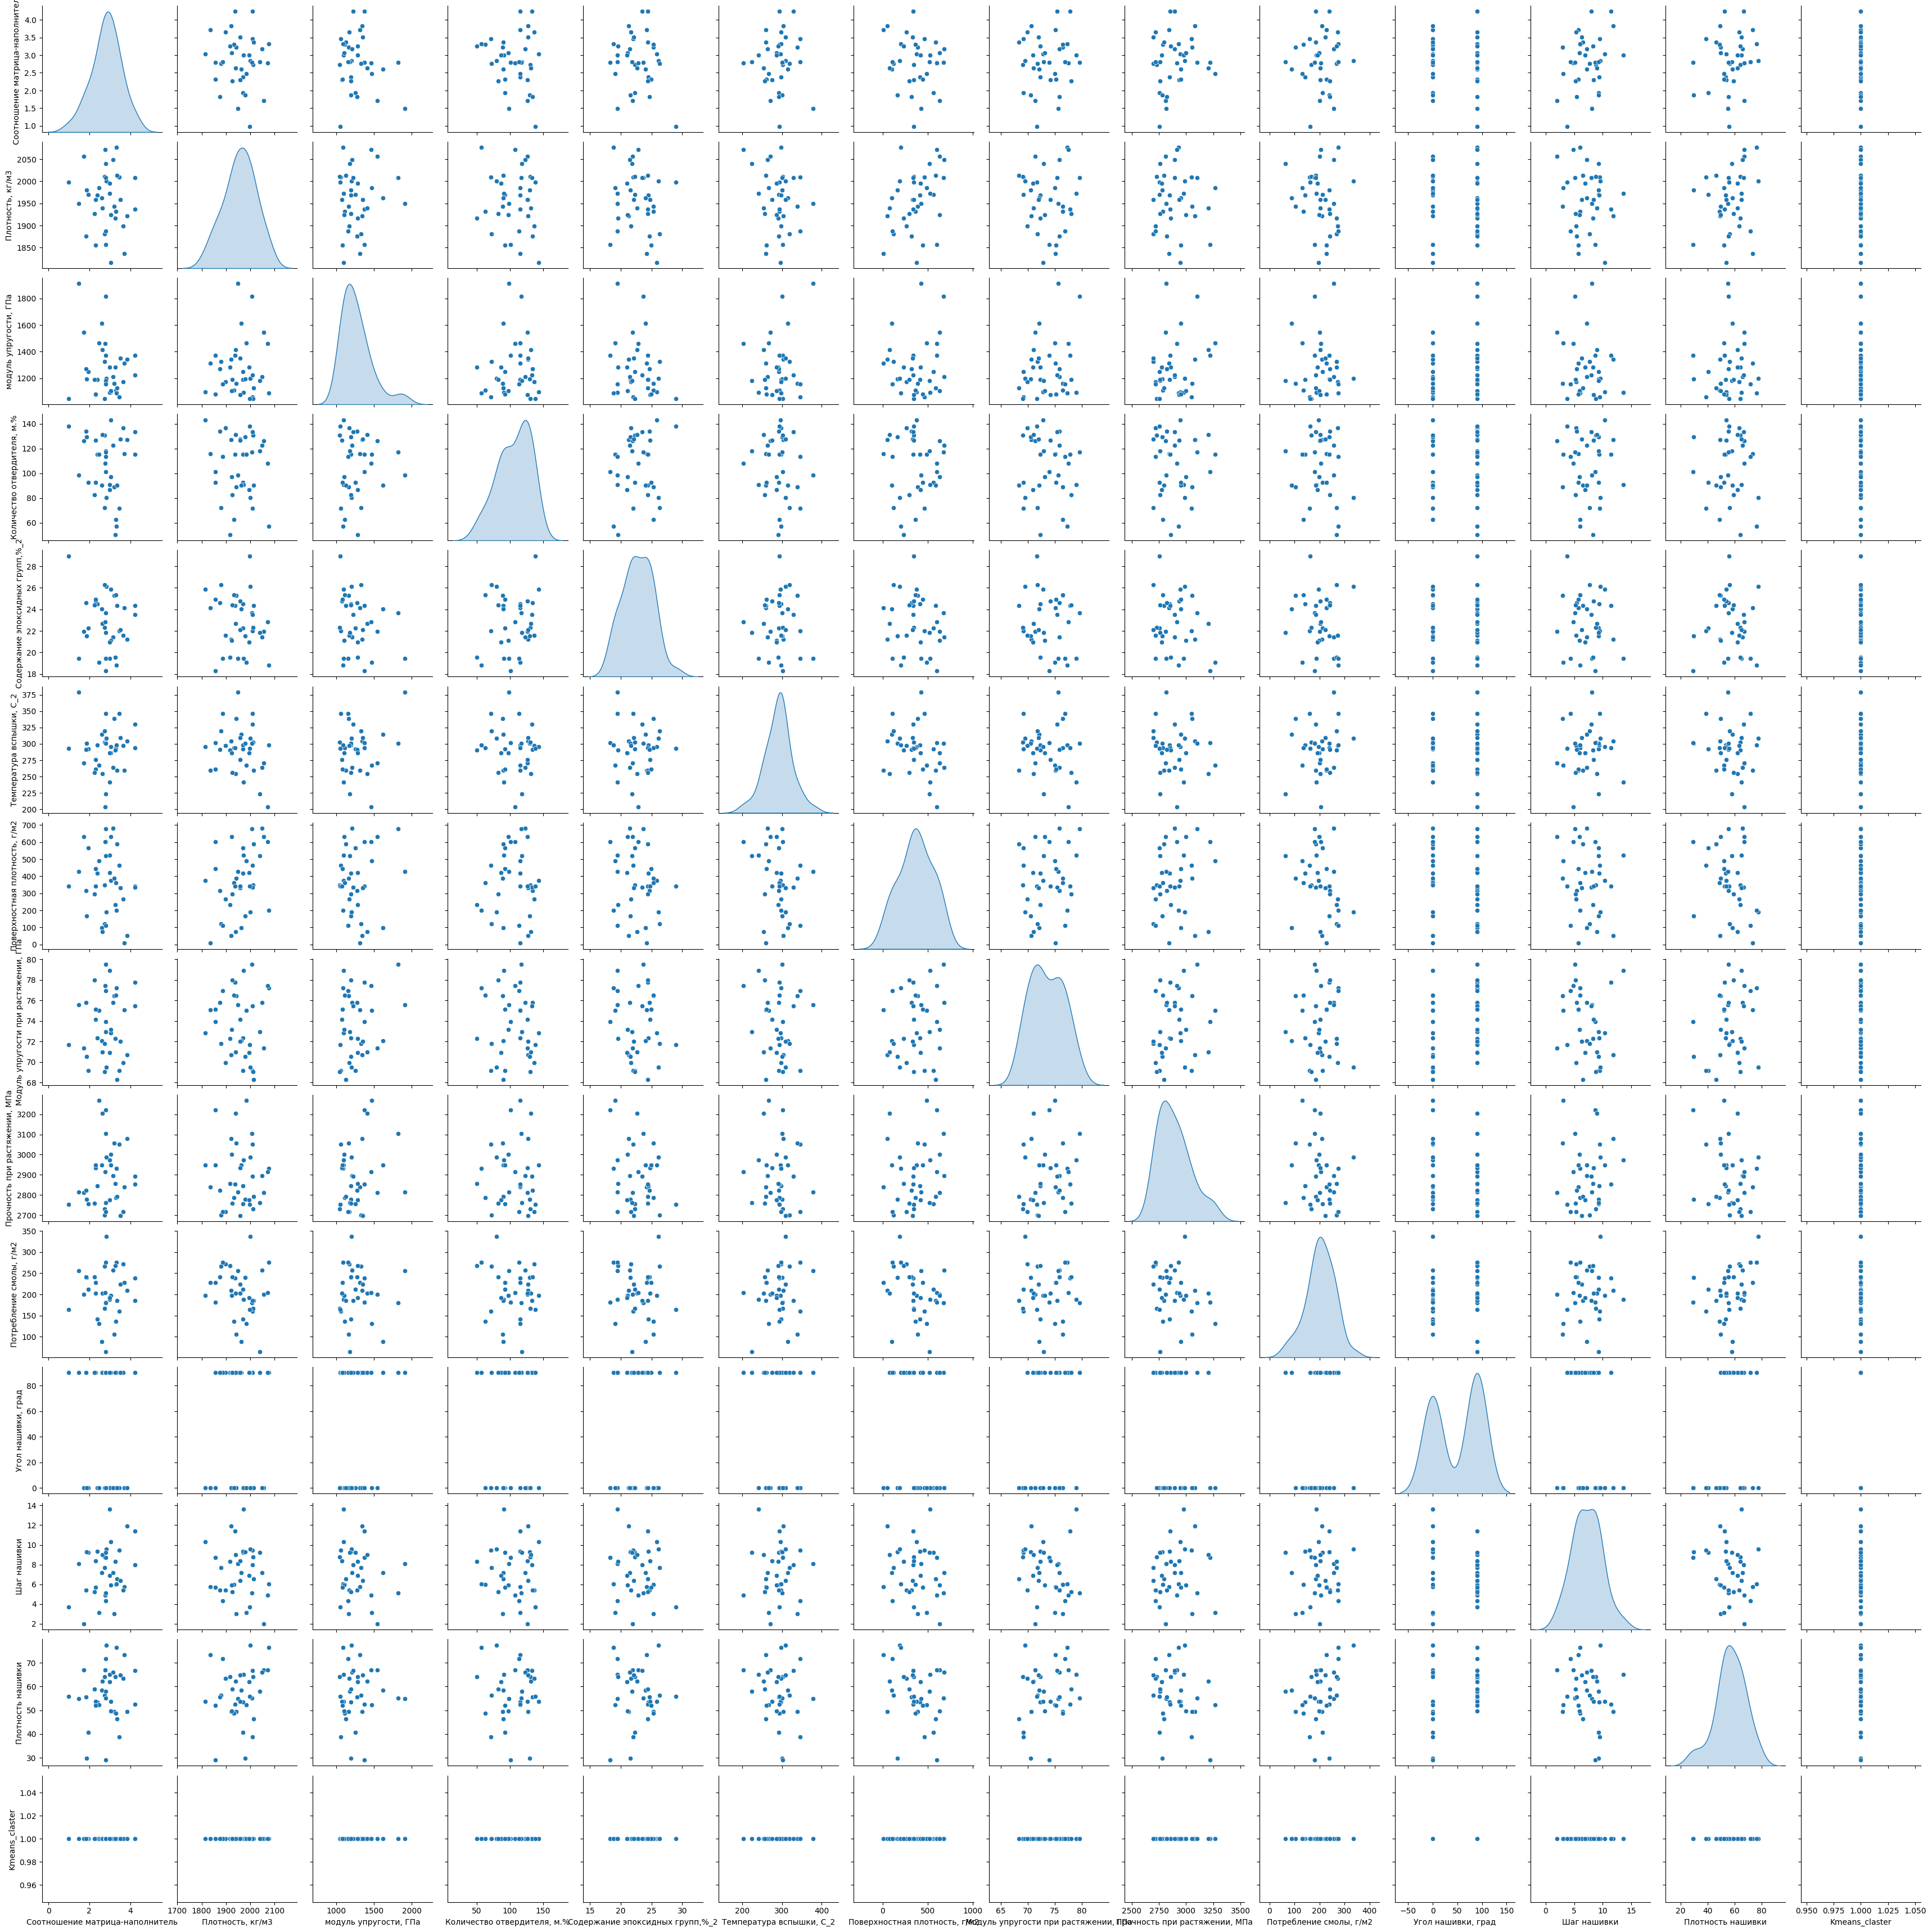

In [38]:
sns.pairplot(ds_by_clusters[0], diag_kind='kde')

In [39]:
columns = ds_by_clusters[0].columns.tolist()

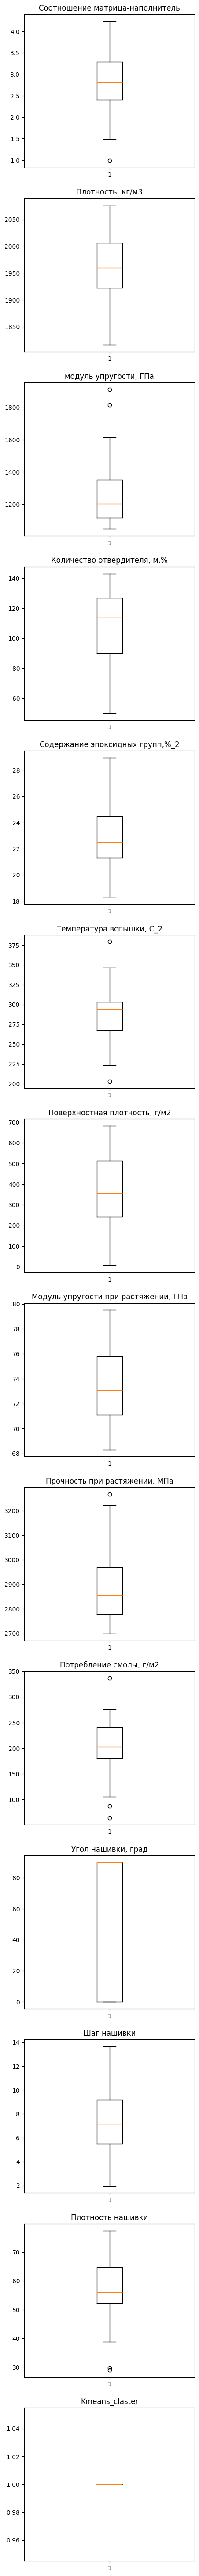

In [40]:
fig, axis = plt.subplots(nrows=len(columns), ncols=1, figsize=(5, 75) )
# fig, axis = plt.subplots(nrows=4, ncols=4, figsize=(75, 55) )
x = 0
# y = 0

for column in columns:
    # if x >= 4:
    #     x = 0
    #     y += 1
    # axis[y, x].boxplot(df[column])
    # axis[y, x].set_title(column)
    axis[x].boxplot(ds_by_clusters[0][column])
    axis[x].set_title(column)
    x+=1
plt.show()

In [69]:
tf.compat.v1.executing_eagerly_outside_functions()

False

In [73]:
tf.compat.v1.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)

ValueError: tf.enable_eager_execution must be called at program startup.

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow.keras.layers import Input, Dense # базовый класс для задания и обучения нейронной сети

from tensorflow.keras.optimizers import SGD

In [48]:
df_ = ds_by_clusters[0].drop('Kmeans_claster', axis=1)

In [60]:
scaller = MinMaxScaler()

y = df_['Соотношение матрица-наполнитель']
# y = output_scaller.fit_transform(y)
X = df_.drop('Соотношение матрица-наполнитель', axis=1)
# X = df_IQR
columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
col = df.columns.tolist()
col.remove('Модуль упругости при растяжении, ГПа')

# Add normalizer layer
normalizer = tf.keras.layers.Normalization(axis=-1, input_shape=[len(columns),])
# Предобучение
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())


[[0.54440403 0.25359797 0.6491896  0.37579897 0.4895496  0.5483678
  0.46606633 0.31326094 0.6274263  0.56666666 0.45833245 0.6214498 ]]


In [72]:
# model = Sequential([normalizer])
model = Sequential()
model.add(tf.keras.layers.Input(len(columns)))
model.add(Dense(32, activation='elu')) # the best variant
# model.add(Dense(180, activation='elu')) # the best variant
# model.add(Dense(160, activation='relu6')) # the best variant
model.add(Dense(64, activation='relu6')) # the best variant
model.add(Dense(1, ))

# PREDICT
# MEAN VALUE: 2.9149367809295654
# MIN VALUE: 0.1824452131986618
# MAX VALUE: 5.307587146759033

# BEST optimizers
# Adam, Lion, Nadam, RMSprop

# Ftrl gives one number in output



# * mean_absolute_percentage_error 
# * huber_loss
# * log_cosh
# * mean_absolute_percentage_error
# * cosine_similarity
# * mean_absolute_error
# * mean_squared_error
# * mean_squared_logarithmic_error

# Compile

model.compile(loss='mse',              
              # optimizer=Adam(learning_rate=0.2), 
              # optimizer='adam',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              # metrics=['mae'])
              metrics=['mse'])

print(model.summary()) # Выводим структуру сети
# Train NN
history=model.fit(X_train,
                  y_train,
                  batch_size=1,
                  epochs=100,
                  # validation_data=(X_test, y_test),
                  # Calculate validation results on 20% of the training data.
                  # validation_split = 0.2)
                  # Подавляем вывол протоколов обучения.
                  verbose=0,
                  # Используем 20% обучающих данных для валидации.
                  validation_split = 0.2)

plt.plot(history.history['mse'])
# plt.plot(history.history['hindle'])
plt.show()

test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

print(f'MSE: {mean_squared_error(y_test, test_predictions)}')
print(f'MAE: {mean_absolute_error(y_test, test_predictions)}')

print(f'''
REAL
MEAN VALUE: {np.mean(y_test)}
MIN VALUE: {np.min(y_test)}
MAX VALUE: {np.max(y_test)}''')

print(f'''
PREDICT
MEAN VALUE: {np.mean(test_predictions)}
MIN VALUE: {np.min(test_predictions)}
MAX VALUE: {np.max(test_predictions)}''')

NotImplementedError: numpy() is only available when eager execution is enabled.